# Kapittel 2 - Konsumentteori 2.1 - 2.4

### Substitusjons- og inntektseffekten av en prisendring
En prisendring har to effekter: (i) substitusjonseffekten som vanligvis gjør at konsumenten bytter bort fra en vare som er blitt relativt dyrere, (ii) inntektseffekten som følger av en endring i reell kjøpekraft pga en prisendring. Figuren viser dekomponeringen for en økning i prisen på gode B, hvor budsjettlinjen dreier fra $m_1$ til $m_2$.

Endring fra tilpasning i punkt a til punkt b viser substitusjonseffekten, som reduserer etterspørsel etter gode B som er blitt relativt dyrere, og øker etterspørsel etter gode A. Endring fra punkt b til punkt c viser inntektseffekten, hvor etterspørsel etter begge goder faller pga av konsumentens realinntekt har falt. I sum (ac) er etterspørsel etter gode B blitt redusert, mens etterspørselen etter gode A er uendret. For gode B går begge effektene i negativ retning (lavere etterspørsel). For gode A er substitusjonseffekten positiv og  inntektseffekten er negativ retning. Ved Cobb-Douglas-preferanser vil krysspriseffekten være null.

![Bilde](Picture2.png)

### Oppskrift for å tegne og beregne inntekts og substitusjonseffekter

Vi ser på en husholdning som har en Cobb-Douglas nyttefunksjon

$U(A,B)=A^{0.5}B^{0.5}$.

Vi antar at  $p_A=p_B=2, I=100$ i utgangspunktet, så økes prisen på gode B til 6.   

  

##### Steg 1
Før prisendringen: beregn optimal verdier på $A, B$ og finn nyttenivået som konsumenten oppnår. Tegn tilpasningen i en figur (budsjettbetingelse, oppnådd nytte og tilpasningspunkt).

##### Steg 2
Prisen på gode B økes. Finn de nye verdiene på $A, B$ og finn det nye nyttenivået. Tegn den nye budsjettlinjen, oppnådd nytte og tilpasningen inn i figuren. Beregn den totale endringen i etterspørsel etter gode 1 og 2. 

##### Steg 3
Gitt den nye prisen på gode B finn hvor mye inntekt konsumenten trenger for å oppnå nyttenivået fra Steg 1. Med denne fiktive budsjettlinjen finn konsumentens tilpasning og tegn denne i figuren.

##### Steg 4
Dekomponer den totale endringen fra Steg 2 i en substitusjonseffekt (langs indifferenskurven fra steg 1) og en inntektseffekt (fra indifferenskurven fra steg 1 til indifferenskurven fra steg 2)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# symboler
A, B, I, p_A, p_B, = sp.symbols("A B I p_A p_B", real=True, positive=True)

# nytte
nytte = A**0.5*B**0.5

# steg 1

A_eq = (0.5*I)/p_A
B_eq = (0.5*I)/p_B



# budsjett A = I/p_A - p_BB/p_B

def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)


# oppnådd nytte i likevekt

Vcd = nytte.subs([(A, A_eq), (B, B_eq)])
Vcd

# LEGG MERKE TIL AT DETTE ER EN FUNKSJON AV I
# DETTE BRUKES I STEG 3

0.5*I**1.0/(p_A**0.5*p_B**0.5)

In [3]:
# lag funksjon for indifferenskurve
U_a=sp.symbols('U_a', real = True, positive=True)

ind_kcd = sp.solve(nytte-U_a, A)[0]
display(ind_kcd)

U_a**2/B

In [4]:
ind_kcd_fn = sp.lambdify((B,U_a), ind_kcd)

ind_kcd_fn

<function _lambdifygenerated(B, U_a)>

In [5]:
# sett inn verdier

B_eq_num = float(B_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
A_eq_num = float(A_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
nytte_num = float(Vcd.subs([(I, 100), (p_A, 2), (p_B, 2)]))
display(A_eq_num)
display(B_eq_num)
display(nytte_num)

25.0

25.0

25.000000000000014

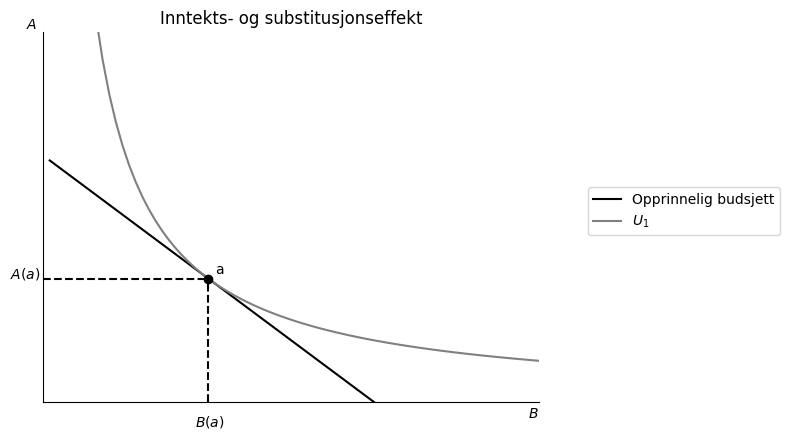

In [6]:
# tegne steg 1

# lage en akse

x=np.linspace(1.01,100, 100)

def create_ax():
                fig, ax = plt.subplots()
                # ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,75))
ax.set(ylim=(0,75))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.set_ylabel('$A$', loc='top', rotation=0)


ax.plot(x, budsjett(100, x, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_num), color='grey',label='$U_1$')

ax.vlines(B_eq_num, 0, A_eq_num, ls='dashed', color='black')
ax.hlines(A_eq_num, 0, B_eq_num, ls='dashed', color='black')

ax.annotate('$B(a)$', (B_eq_num-2, -5), annotation_clip=False)
ax.annotate('$A(a)$', (-5, A_eq_num), annotation_clip=False)
ax.annotate('a', (B_eq_num+1,A_eq_num+1))
ax.plot(B_eq_num, A_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [7]:
# Steg 2

# beregne nye verdier
B_eq_ny = float(B_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
A_eq_ny = float(A_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
nytte_ny = float(Vcd.subs([(I, 100), (p_B, 6), (p_A, 2)]))


display(B_eq_ny)
display(A_eq_ny)
display(nytte_ny)

8.333333333333332

25.0

14.433756729740649

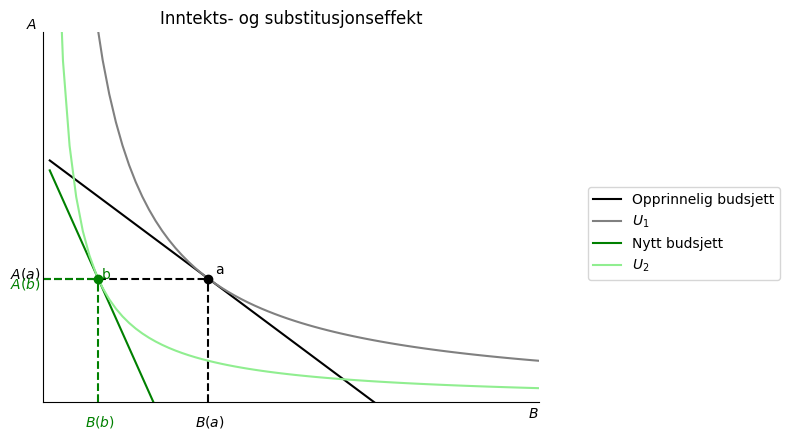

In [8]:
# legg nye verdier på tegningen

ax.plot(x, budsjett(100, x, 6, 2), color='green', label='Nytt budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_ny), color='lightgreen', label='$U_2$')

ax.vlines(B_eq_ny, 0, A_eq_ny, ls='dashed', color='green')
ax.hlines(A_eq_ny, 0, B_eq_ny, ls='dashed', color='green')

ax.annotate('$B(b)$', (B_eq_ny-2, -5), color='green', annotation_clip=False)
ax.annotate('$A(b)$', (-5, A_eq_ny-2), color= 'green', annotation_clip=False)
ax.annotate('b', (B_eq_ny+.5,A_eq_ny), color='green')
ax.plot(B_eq_ny, A_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [9]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_I = Vcd.subs([(p_B, 6), (p_A, 2)])
V_I

0.144337567297406*I**1.0

In [10]:
fikt_cdm = sp.solve(V_I-nytte_num, I)
float(fikt_cdm[0])


173.20508075688826

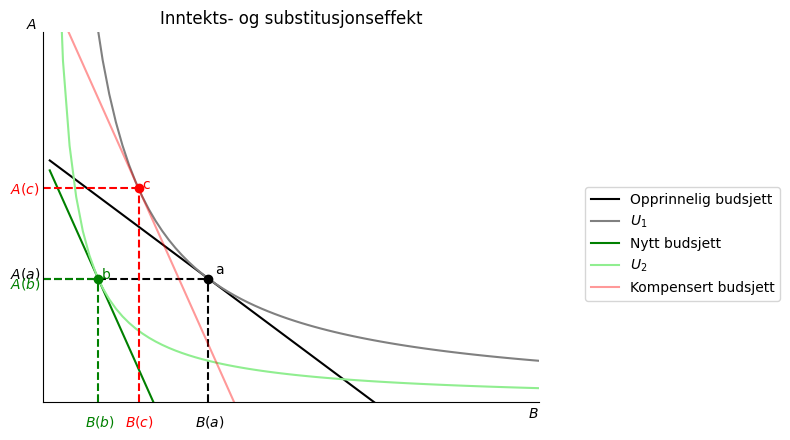

In [11]:
# fiktiv inntekt er 269.24
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
Bcd_eq_komp = float(B_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))
Acd_eq_komp = float(A_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))

# tegne budsjett med denne inntekten "kompensert budsjett"

ax.plot(x, budsjett(float(fikt_cdm[0]), x, 6, 2), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(Bcd_eq_komp, 0, Acd_eq_komp, ls='dashed', color='red')
ax.hlines(Acd_eq_komp, 0, Bcd_eq_komp, ls='dashed', color='red')

ax.annotate('$B(c)$', (Bcd_eq_komp-2, -5), color='red', annotation_clip=False)
ax.annotate('$A(c)$', (-5, Acd_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('c', (Bcd_eq_komp+.5,Acd_eq_komp), color='red')
ax.plot(Bcd_eq_komp, Acd_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Tabell kan også for å vise effektene på en ryddig måte. 

In [12]:

from IPython.display import Markdown

Substitusjonseffekt_gode1 = Bcd_eq_komp-B_eq_num
Inntektseffekt_gode_1 = B_eq_ny-Bcd_eq_komp
Totaleffekt_gode_1 = B_eq_ny-B_eq_num

tblcd=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | ${np.round(float(Bcd_eq_komp-B_eq_num),2)}$|${np.round(float(B_eq_ny-Bcd_eq_komp),2)}$| ${np.round(float(B_eq_ny-B_eq_num),2)}$     |
| 2 |${np.round(float(Acd_eq_komp-A_eq_num),2)}$ | ${np.round(float(A_eq_ny-Acd_eq_komp),2)}$ |  ${np.round(float(A_eq_ny-A_eq_num),2)}$    |

"""
display(Markdown(tblcd))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | $-10.57$|$-6.1$| $-16.67$     |
| 2 |$18.3$ | $-18.3$ |  $0.0$    |



## 2.1 Effekten av høyere strømpriser, i to steg

Anne og venninnen Beate sitter fortsatt på kafeen og diskuterer den høye strømprisen. De to godene, mat (A) og en varm bolig (B), kostet i utgangspunktet $p_B^{l} = p_A = 1$, og så dobles prisen på strøm slik at $p_B^{h} = 2$.

De har begge en inntekt på $I = 1$.

Anne har en balansert Cobb-Douglas-nyttefunksjon, mens Beate legger større vekt på en god og varm bolig, med en nyttefunksjon:

$$
U_{Beate} = A^{0.25}B^{0.75}
$$

Annes substitusjons- og inntektseffekter av prisøkningen finner vi i matteboks 2.1 i boken, men hva med Beates?

Fokuser på effekten på konsumet av gode B, og regn ut og illustrer. Sammenlign effekten av prisøkningen for de to venninnene.

## Utregning for første oppgave

$$
I = 1,
P_A = P^l_B = 1
P^h_B = 2
$$

$$
U_{Beate} = A^{0.25}B^{0.75}
$$

For å kunne dekomponere inntekts og substitusjonseffektene så må vi beregene hvor mye strøm Beate hadde dersom hun fikk akkurat nok penger til å beholde samme nytte som før gitt nye priser. 


$$
\frac{MU_A}{MU_B} = \frac{p_A}{p_B} \rightarrow \frac{0.25 \cdot A^{-0.75} \cdot B^{0.75}}{0.75 \cdot A^{0.25} \cdot B^{-0.25}} \rightarrow \frac{0.25 \cdot B}{0.75 \cdot A} = \frac{1}{2}
$$

I tilfelle det ikke er klart hvordan vi kommer frem til $\frac{0.25\cdot B}{0.75 \cdot A}$ så ligger litt grundigere utregning nederst i dokumentet



$$
\frac{B}{3A} = \frac{1}{2} \rightarrow 2B = 3A \rightarrow A = \frac{2}{3}B
$$



Bytter ut A med $\frac{2}{3}B$ i nyttefunksjonen og setter den lik start-nytten
$$
\left(\frac{2}{3}B\right)^{0.25} \cdot B^{0.75} = 0.569877
$$

Vi kan bruke eksponentreglene for å forenkle dette uttrykket

$$
\left(\frac{2}{3}\right)^{0.25} \cdot B^{0.25} \cdot B^{0.75} = 0.569877
$$

Setter sammen


$$
0.9036 \cdot B^{1} = 0.569877
$$

In [13]:
A, B, I, p_A, p_B,a = sp.symbols('A B I p_A p_B a')

I = 1
p_A = 1
p_B = 1
# Budsjett
budsjett = sp.Eq(p_A * A + p_B * B, I)

budsjett

Eq(A + B, 1)

In [14]:
# Løser for A, da vet vi budjsettlinjen
A_eq = sp.solve(budsjett, A)[0]
A_eq

1 - B

In [15]:
# Optimal etterspørsel (Cobb-Douglas)
def optimal_konsum(alpha,I, p_A, p_B):
    A_opt = (alpha * I) / p_A
    B_opt = ((1 - alpha) * I) / p_B
    return sp.simplify(A_opt), B_opt

In [16]:
# Nyttevekten til Beate
alpha_beate = sp.solve(sp.Eq(1-a, 3*a), a)[0]

alpha_beate

1/4

In [17]:
A_beate, B_beate = optimal_konsum(alpha_beate,I,p_A,p_B)

display(A_beate.evalf(), B_beate.evalf())

0.250000000000000

0.750000000000000

In [18]:
# Indifferenskurver
def indifferenskurve(A_verdier, alpha, U0):
    return (U0 / A_verdier**alpha)**(1/(1-alpha))

U0_beate = round(A_beate**alpha_beate * B_beate**(1-alpha_beate), 3)

U0_beate

0.570

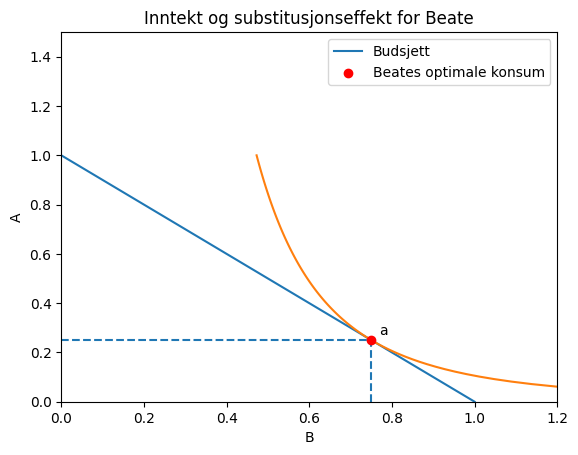

In [19]:
b_verdier = np.linspace(0.001, 1, 100)

# Tegner figur
fig, ax = plt.subplots()

# Budsjettlinje
ax.plot(b_verdier, (1-b_verdier), label='Budsjett')

# Indifferenskurve
ax.plot(indifferenskurve(b_verdier, alpha_beate, U0_beate), b_verdier)

# Legg inn optimalpunktet
ax.scatter(float(B_beate), float(A_beate), color='red', zorder= 6, label='Beates optimale konsum')

# Tegner punkt a
ax.annotate('a', (float(B_beate)+0.02, float(A_beate)+0.02))

# Tittel og akselimitasjon
ax.set(xlim=(0,1.2))
ax.set(ylim=(0,1.5))
ax.set_title('Inntekt og substitusjonseffekt for Beate')
ax.set_xlabel('B')
ax.set_ylabel('A')

# Tegner linjer
ax.vlines(float(B_beate), 0, float(A_beate), ls='--')
ax.hlines(float(A_beate), 0, float(B_beate), ls='--')



ax.legend();

In [20]:
# Inntektseffekt
p_B = 2

A_beate,B_beate = optimal_konsum(alpha_beate,I,p_A,p_B)

display(A_beate.evalf(), B_beate.evalf())

0.250000000000000

0.375000000000000

In [21]:
# Inntektseffekt
U1_beate = A_beate**alpha_beate * B_beate**(1-alpha_beate)

U1_beate.evalf()

0.338850751353692

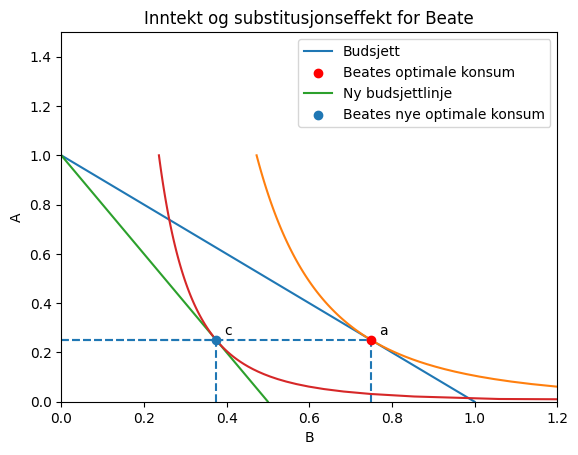

In [22]:
# Tegner figur

# Ny Budsjettlinje
ax.plot((1-b_verdier)/2, b_verdier, label='Ny budsjettlinje')

# Legg inn nytt optimalpunkt
ax.scatter(float(B_beate), float(A_beate), zorder= 6, label='Beates nye optimale konsum')

# Tegner linjer
ax.vlines(float(B_beate), 0, float(A_beate), ls='--')
ax.hlines(float(A_beate), 0, float(B_beate), ls='--')

# Indifferenskurve
ax.plot(indifferenskurve(b_verdier, alpha_beate, U1_beate), b_verdier)

# Tegner punkt c
ax.annotate('c', (float(B_beate)+0.02, float(A_beate)+0.02))

ax.legend();
fig

In [23]:
# Substitusjonseffekt

# Optimalt forhold A/B med ny pris
opt_forhold = (alpha_beate/(1-alpha_beate)) * (p_B/p_A)

# A uttrykt ved B
A_sub = opt_forhold * B

# Hold gammel nytte konstant
U_likning = sp.Eq((A_sub**alpha_beate) * (B**(1-alpha_beate)), U0_beate)

# Løs for B
B_sub = sp.solve(U_likning, B)[0]
B_sub.evalf()

0.630751353197074

In [24]:
# Finner A ved substitusjonseffekt

A_sub_verdi = A_sub.subs(B, B_sub)
A_sub_verdi = A_sub_verdi.evalf()

A_sub_verdi

0.420500902131383

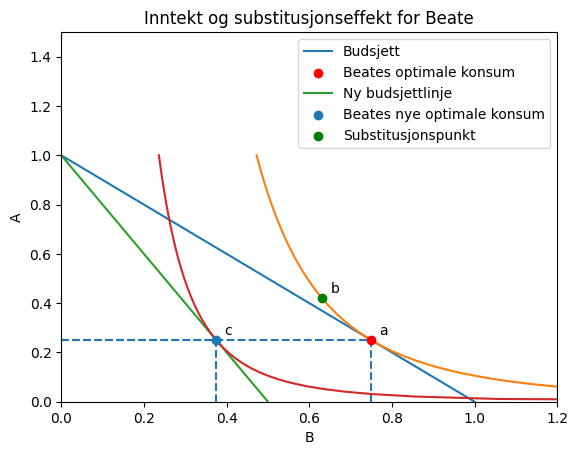

In [25]:
# Substitusjonseffekt
ax.scatter(float(B_sub), float(A_sub_verdi), color='green', zorder=6, label='Substitusjonspunkt')
ax.annotate('b', (float(B_sub)+0.02, float(A_sub_verdi)+0.02))


ax.legend();
fig

In [26]:
B0 = float(0.75)        # opprinnelig (eller bruk B_beate før prisendring)
B1 = float(B_beate)     # etter prisendring

# Regner ut effektene
substitusjonseffekt = B_sub - B0
inntektseffekt = B1 - B_sub
totaleffekt = B1 - B0


print("\n--- TABELL ---")
print("Type effekt        Verdi")
print("-------------------------")
print(f"Substitusjon     {substitusjonseffekt:.3f}")
print(f"Inntekt          {inntektseffekt:.3f}")
print(f"Total            {totaleffekt:.3f}")



--- TABELL ---
Type effekt        Verdi
-------------------------
Substitusjon     -0.119
Inntekt          -0.256
Total            -0.375


Løser for kompensert B

$$
B_{komp} = \frac{0.569877}{0.9036} \approx 0.63
$$

Beate ville brukt 0.63 på strøm dersom hun fikk akkurat nok penger til å beholde samme nytte som før gitt nye priser. Dette er det "hypotetiske" forbruket av strøm hvis hun ble kompensert for å beholde nytten. 

$$
SE = 0.63 - 0.75 = -0.119
$$
$$
IE = 0.375 - 0.63 = -0.256
$$

Total effekt

$$
TE = SE + IE = -0.12 + (-0.256) \approx -0.375
$$

## 2.2 Hvordan påvirker en renteøkning etterspørselen etter bolig og andre ting?

Du er nyutdannet siviløkonom og har fått jobb i analyseavdelingen i Norges Bank. En av dine oppgaver er å følge med på hvordan etterspørselen utvikler seg i ulike markeder. Styringsrenten er nettopp satt opp, og bankenes rente på boliglån forventes å følge etter.

Sjefen er interessert i hvordan en endring i renten påvirker ettersøprselen etter bolig og andre ting, og ber deg bruke mikroøkonomisk teori for å belyse dette spørsmålet.

Du tar utgangspunkt i at økning i renten gjør at prisen på boligkonsum, $p_B$, går opp. Og så tenker du at det kan være nyttig å bruke et talleksempel for å illustrere effektene. Du antar at husholdningen har en inntekt $I = 1$, som kan brukes på bolig (B) og andre ting (A); at prisene i utgangspunktet er $p_B^{l} = p_A = 1$; og at renteøkningen så fører til at prisen på B dobles til $p_B^{h} = 2$.

Bolig er et spesielt gode, man trenger tak over hodet. Du velger derfor å studere to ulike nyttefunksjoner: En balansert Cobb-Douglas-funksjon:

$$
U = A^{0.5}B^{0.5},
$$

hvor $A$ er andre ting og $B$ er bolig.

Og en nyttefunksjon hvor bolig er et basisgode:

$$
U = A^{0.5}(B-b)^{0.5},
$$

hvor $b$ er minstekonsumet av gode $B$, og hvor du lar være $b = 0.2$.

Du regner ut konsumet av $A$ og $B$ før og etter rentehevingen og illustrerer dine funn ved hjelp av figurer. Bruk en figur for hver nyttefunksjon, og kommenter forskjellene du ser.

In [27]:
A, B = sp.symbols('A B', positive=True)

I = 1
p_A = 1
p_B_lav = 1
p_B_hoy = 2
alpha = 0.5

def cobb_douglas(alpha, I, p_A, p_B):
    A_opt = alpha * I / p_A
    B_opt = (1 - alpha) * I / p_B
    return A_opt, B_opt


In [28]:
A0, B0 = cobb_douglas(alpha, I, p_A, p_B_lav)
A1, B1 = cobb_douglas(alpha, I, p_A, p_B_hoy)

display(A0, B0)
display(A1, B1)

0.5

0.5

0.5

0.25

In [29]:
def indiff(A_vals, alpha, U0):
    return (U0 / (A_vals**alpha))**(1/(1-alpha))


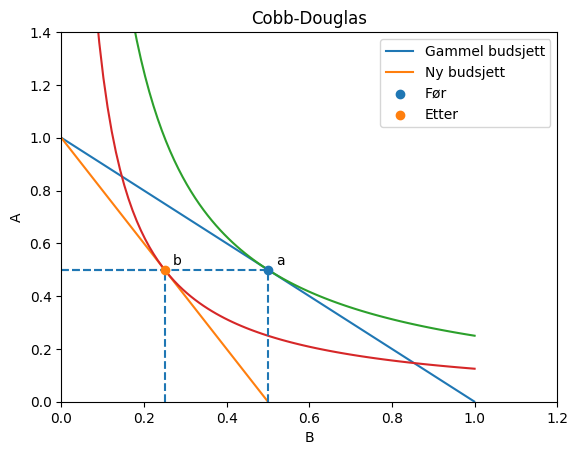

In [30]:
a_verdier = np.linspace(0.001, 1, 100)

U0 = (A0**alpha) * (B0**(1-alpha))
U1 = (A1**alpha) * (B1**(1-alpha))

fig, ax = plt.subplots()

# Budsjettlinjer
ax.plot((1-a_verdier), a_verdier, label="Gammel budsjett")
ax.plot((1-a_verdier)/2, a_verdier, label="Ny budsjett")

# Indifferens
ax.plot(a_verdier, indiff(a_verdier, alpha, U0))
ax.plot(a_verdier, indiff(a_verdier, alpha, U1))
# Punkter
ax.scatter(B0, A0, label="Før",zorder=6)
ax.scatter(B1, A1, label="Etter",zorder=6)

# Tegner linjer
ax.vlines(B0, 0, A0, ls='--')
ax.hlines(A0, 0, B0, ls='--')
ax.vlines(B1, 0, A1, ls='--')
ax.hlines(A1, 0, B1, ls='--')

# Skriver a og b
ax.annotate('a', (B0+0.02, A0+0.02))
ax.annotate('b', (B1+0.02, A1+0.02))

# Tittel og akselimitasjon
ax.set(xlim=(0,1.2))
ax.set(ylim=(0,1.4))
ax.set_xlabel('B')
ax.set_ylabel('A')
ax.set_title("Cobb-Douglas")
ax.legend();


In [31]:
b = 0.2

def cobb_min(alpha, I, p_A, p_B, b):
    B_tilde = (1-alpha) * (I - p_B*b) / p_B
    A_opt = alpha * (I - p_B*b) / p_A
    B_opt = B_tilde + b
    return A_opt, B_opt

In [32]:
A0b, B0b = cobb_min(alpha, I, p_A, p_B_lav, b)
A1b, B1b = cobb_min(alpha, I, p_A, p_B_hoy, b)

print(A0b, B0b)
print(A1b, B1b)

0.4 0.6000000000000001
0.3 0.35


In [33]:
def indiff_b(A_vals, alpha, U0, b):
    return ((U0 / (A_vals**alpha))**(1/(1-alpha))) + b


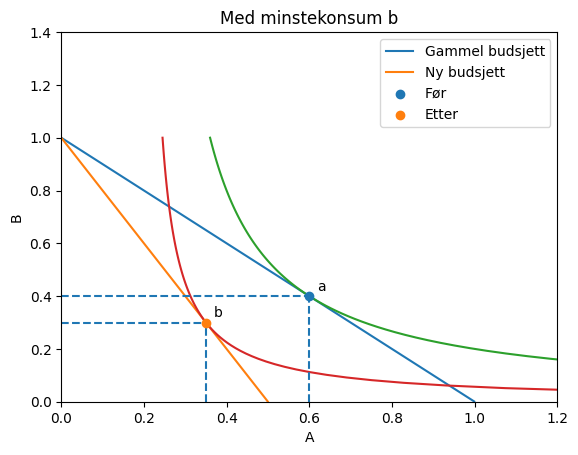

In [34]:
U0b = (A0b**alpha) * ((B0b-b)**(1-alpha))
U1b = (A1b**alpha) * ((B1b-b)**(1-alpha))
fig, ax = plt.subplots()

ax.plot((1-a_verdier), a_verdier, label="Gammel budsjett")
ax.plot((1-a_verdier)/2, a_verdier, label="Ny budsjett")

ax.plot(indiff_b(a_verdier, alpha, U0b, b), a_verdier)
ax.plot(indiff_b(a_verdier, alpha, U1b, b), a_verdier)

ax.scatter(B0b, A0b, label="Før",zorder=6)
ax.scatter(B1b, A1b, label="Etter",zorder=6)

# Tegner linjer
ax.vlines(B0b, 0, A0b, ls='--')
ax.hlines(A0b, 0, B0b, ls='--')
ax.vlines(B1b, 0, A1b, ls='--')
ax.hlines(A1b, 0, B1b, ls='--')

# skriver a og b
ax.annotate('a', (B0b+0.02, A0b+0.02))
ax.annotate('b', (B1b+0.02, A1b+0.02))

ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("Med minstekonsum b")
ax.set(xlim=(0,1.2))
ax.set(ylim=(0,1.4))
ax.legend();
